<a href="https://colab.research.google.com/github/sipocz/Alarm/blob/main/model4/pid_autoencoder_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 6.7 MB/s 
     |████████████████████████████████| 182 kB 40.2 MB/s 
     |████████████████████████████████| 174 kB 58.3 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 173 kB 60.7 MB/s 
     |████████████████████████████████| 168 kB 56.9 MB/s 
     |████████████████████████████████| 168 kB 60.1 MB/s 
     |████████████████████████████████| 166 kB 64.8 MB/s 
     |████████████████████████████████| 166 kB 60.1 MB/s 
     |████████████████████████████████| 162 kB 74.8 MB/s 
     |████████████████████████████████| 162 kB 69.3 MB/s 
     |████████████████████████████████| 158 kB 60.9 MB/s 
     |████████████████████████████████| 157 kB 59.7 MB/s 
     |████████████████████████████████| 157 kB 61.8 MB/s 
     |████████████████████████████████| 157 kB 71.4 MB/s 
     |████████████████████████████

In [2]:
import pandas as pd
import os
import seaborn as sns
import wandb

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#user = "Anna"
user = "SL"
uzem = "Szint1"
data_source="5"
#fname="72C03_TC_error_toNN.csv"
fname_good = "415_SC_error_part1.csv"
fname_bad = "415_SC_error_part2.csv"

In [6]:
# Elérési út a 415_SC_error-hoz
if user=="Anna":
    path_good = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/" + data_source + "/" + fname_good
    path_bad = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/" + data_source + "/" + fname_bad
    path_fig = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/plots/"
else:
    path_good = "/content/drive/MyDrive/2022Anna/Datapipeline/" + data_source + "/" + fname_good
    path_bad = "/content/drive/MyDrive/2022Anna/Datapipeline/" + data_source + "/" + fname_bad
    path_fig = "/content/drive/MyDrive/2022Anna/Datapipeline/plots/"


In [7]:
print(path_good)
print(path_bad)

/content/drive/MyDrive/2022Anna/Datapipeline/5/415_SC_error_part1.csv
/content/drive/MyDrive/2022Anna/Datapipeline/5/415_SC_error_part2.csv


In [8]:
df_good = pd.read_csv(path_good,usecols=None)
df_bad = pd.read_csv(path_bad,usecols=None)

In [9]:
print(df_good.isnull().values.any())
print(df_bad.isnull().values.any())

False
False


In [10]:
df_good.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-54.810024,-80.342186,-60.770203,-41.081482,-21.779583,-3.82353,-0.806820,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875
1,-80.342186,-60.770203,-41.081482,-21.779583,-3.823530,-0.80682,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875


In [11]:

import matplotlib.pyplot as plot



df_ = df_good

# You must normalize the data before applying the fit method
df_good_normalized=(df_ - df_.mean()) / df_.std()

# Normalize bad data with the good data parameters
df_bad_normalized=(df_bad - df_.mean()) / df_.std()

In [12]:
from sklearn.preprocessing import MinMaxScaler
df_all=pd.concat([df_good,df_bad],axis=0)
scaler=MinMaxScaler()
scaler.fit(df_all)
good_scaled=scaler.transform(df_good)
bad_scaled=scaler.transform(df_bad)


In [13]:
df_good_scaled=pd.DataFrame(good_scaled,columns=df_all.columns)
df_bad_scaled=pd.DataFrame(bad_scaled,columns=df_all.columns)
df_good_scaled["state"]=0
df_bad_scaled["state"]=1

In [14]:
df_good_scaled

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,state
0,0.203312,0.000000,0.000000,0.149256,0.339488,0.516456,0.546188,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
1,0.000000,0.155851,0.185726,0.339488,0.516456,0.546188,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
2,0.155851,0.312632,0.367803,0.516456,0.546188,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
3,0.312632,0.466332,0.537185,0.546188,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
4,0.466332,0.609315,0.565642,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0.641521,0.641521,0.575337,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
1054,0.641521,0.641521,0.575337,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
1055,0.641521,0.641521,0.575337,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
1056,0.641521,0.641521,0.575337,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0


In [15]:
df_all_scaled=pd.concat([df_good_scaled,df_bad_scaled],axis=0)

In [16]:
df_all_scaled.tail()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,state
1263,0.641184,0.641184,0.574937,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,...,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,1
1264,0.641184,0.641184,0.574937,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,...,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,1
1265,0.641184,0.641184,0.574937,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,...,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,1
1266,0.641184,0.641184,0.574937,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,...,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,1
1267,0.641184,0.641184,0.574937,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,...,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,0.555899,1


In [172]:
import wandb



In [173]:
'''
7 dimenzióra képez, a grafikus megjelenítés biztató
_N1_=135
_N2_=30
_N3_=7
_lr_=0.0001
_batch_size_=32
_drop1_=0.0
_drop2_=0.0
_epochs_=3500
'''


_N1_=135
_N2_=30
_N3_=2
_lr_=0.0001
_batch_size_=32
_drop1_=0.0
_drop2_=0.0
_epochs_=3500


In [174]:
config = {"lr": _lr_, "batch_size": _batch_size_,"architecture": "AutoencoderNN", 
          "depth": 2,
          "layer1":_N1_,  "layer2":_N2_,"layer3":_N3_,"layer4":_N2_,"layer5":_N1_,"layer_out":20, 
          "drop1":_drop1_,"drop2":_drop2_,
          "epochs":_epochs_
          
          
          }

wandb.init(project="pid_autoencoder", entity="sipoczlaszlo",config=config)


epoch/MAE,████████▇▇▅▄▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,██████████████████████████████████▁▁▁▁▁▁
epoch/loss,████████▇▇▅▄▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/lr,██████████████████████████████████▁▁▁▁▁▁
epoch/MAE,0.02206
epoch/epoch,3499
epoch/learning_rate,1e-05
epoch/loss,0.02206
epoch/lr,1e-05


In [175]:
from keras.engine.base_layer import regularizers
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD,Adam,Adamax,Nadam,Ftrl,Adadelta
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler

clear_session()

kernel_reg_1=tf.keras.regularizers.L2(0.1)

input_size=20


input1=Input(shape=(input_size,))
l1_out=Dense(_N1_,activation="sigmoid",kernel_initializer='glorot_uniform',kernel_regularizer=None)(input1) # kernel_initializer='lecun_normal'  # L1

l2_out=Dropout(_drop1_)(l1_out)

l3_out=Dense(_N2_,activation="sigmoid",kernel_initializer='glorot_uniform',kernel_regularizer=None)(l2_out) #kernel_initializer='lecun_normal',  # L2
l4_out=Dropout(_drop2_)(l3_out)

l5_out=Dense(_N3_,activation="linear",kernel_initializer='glorot_uniform',name="encoded",kernel_regularizer=None)(l4_out) #kernel_initializer='lecun_normal',  # L3

l7_out=Dense(_N2_,activation="sigmoid",kernel_initializer='glorot_uniform',kernel_regularizer=None)(l5_out) #kernel_initializer='lecun_normal',  # L4

l9_out=Dense(_N1_,activation="sigmoid",kernel_initializer='glorot_uniform',kernel_regularizer=None)(l7_out) #kernel_initializer='lecun_normal',  # L5




pred=Dense(input_size, activation="linear",)(l9_out)

model = Model(inputs=input1, outputs=pred)
optimizer=Adamax(learning_rate=_lr_,) #

model.compile(loss='MAE',
    optimizer=optimizer,
    metrics=["MAE"])

In [176]:
# autoencoder

In [177]:
prediktorok=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19"]
X_NN=df_all_scaled[prediktorok][:]  # 
y_NN=df_all_scaled["state"][:]

In [178]:
model_file="model_PID__54_loss_0.116_vloss_0.115_acc_0.953_vacc_0.958.hdf5"
#model_file="model_PID__94_loss_0.116_vloss_0.115_acc_0.950_vacc_0.966.hdf5"
model_file="model_PID__4491_loss_0.115_vloss_0.679_acc_0.954_vacc_0.880.hdf5"

In [179]:
model_url="https://github.com/sipocz/pid_time_series/raw/main/model3/"+model_file

In [180]:
__load_file__=False

In [181]:
if __load_file__:
    ! rm *.hdf5 
    ! wget $model_url
    model.load_weights(model_file)

In [182]:
X_train,X_test,y_train,y_test=train_test_split(X_NN,y_NN,train_size=len(X_NN)-1,shuffle=True,random_state=33)

In [183]:
len(X_NN)

2326

In [184]:
!rm *.hdf5 

rm: cannot remove '*.hdf5': No such file or directory


In [185]:
def learning_rate_corrector(epoch,lr):
    
    if epoch > 4000:
        lr = 0.000005
        return lr
    if epoch > 3000:
        lr = 0.00001
        return lr
    if epoch > 2000:
        lr = 0.0001
        return lr
    
    if epoch > 500:
        lr = 0.0001
        return lr
    return lr
    

In [186]:
from wandb.keras import WandbMetricsLogger
fname="./model_Encoder_"
callbacks = [
        LearningRateScheduler(learning_rate_corrector,verbose=1),
        WandbMetricsLogger(),       
        #ModelCheckpoint(filepath=fname+"_{epoch:04.0f}"+"_loss_{loss:.3f}_vloss_{val_loss:.3f}_acc_{MAE:.3f}_vacc_{val_MAE:.3f}.hdf5", 
        #                monitor='loss', verbose=2, save_best_only=True, mode='min')
        ]


In [187]:
__learning__=True

In [188]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 135)               2835      
                                                                 
 dropout (Dropout)           (None, 135)               0         
                                                                 
 dense_1 (Dense)             (None, 30)                4080      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 encoded (Dense)             (None, 2)                 62        
                                                                 
 dense_2 (Dense)             (None, 30)                90    

In [318]:
if __learning__: 
    history = model.fit(X_train, X_train, epochs=_epochs_, batch_size=_batch_size_, verbose=1,callbacks=callbacks)


A streamkimeneten csak az utolsó 5000 sor látható.
Epoch 2251: LearningRateScheduler setting learning rate to 0.0001.
Epoch 2251/3500
73/73 [==============================] - 0s 3ms/step - loss: 0.0197 - MAE: 0.0197 - lr: 1.0000e-04

Epoch 2252: LearningRateScheduler setting learning rate to 0.0001.
Epoch 2252/3500
73/73 [==============================] - 0s 3ms/step - loss: 0.0197 - MAE: 0.0197 - lr: 1.0000e-04

Epoch 2253: LearningRateScheduler setting learning rate to 0.0001.
Epoch 2253/3500
73/73 [==============================] - 0s 3ms/step - loss: 0.0198 - MAE: 0.0198 - lr: 1.0000e-04

Epoch 2254: LearningRateScheduler setting learning rate to 0.0001.
Epoch 2254/3500
73/73 [==============================] - 0s 3ms/step - loss: 0.0197 - MAE: 0.0197 - lr: 1.0000e-04

Epoch 2255: LearningRateScheduler setting learning rate to 0.0001.
Epoch 2255/3500
73/73 [==============================] - 0s 3ms/step - loss: 0.0198 - MAE: 0.0198 - lr: 1.0000e-04

Epoch 2256: LearningRateScheduler 

In [319]:
#model.save("autoencoder_model.hdf5")

In [345]:
__load_file__=False
model_file="model_PID__0634_loss_0.086_vloss_1.253_acc_0.961_vacc_0.886.hdf5"
model_url="https://github.com/sipocz/pid_time_series/raw/main/model3/"+model_file

In [346]:
if __load_file__:
    ! rm *.hdf5 
    ! wget $model_url
    model.load_weights(model_file)

In [347]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 22ms/step


In [348]:
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

In [349]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Binarizer
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [350]:
i1=model.get_layer("dense")

In [351]:
o1=model.get_layer("encoded")

In [352]:

from tensorflow.keras import backend as K

In [353]:
hidden_states_fun = K.function([i1.input],[o1.output])
     

In [354]:
def get_embedding(X):
    """Return the hidden state associated with an input at the given timestep.
    """
    
    hidden_states = hidden_states_fun(X.to_numpy())[0]
    
    return hidden_states
     

In [355]:
get_embedding(X_train)

array([[ 0.57784563,  0.27445072],
       [-0.03907394,  0.37595013],
       [ 0.5075533 ,  0.54544836],
       ...,
       [ 0.5304641 ,  0.52746457],
       [ 0.5303696 ,  0.5262558 ],
       [ 0.5291784 ,  0.52650565]], dtype=float32)

In [356]:
hs=hidden_states_fun(X_train.to_numpy())[0]

In [357]:
len(hs)

2325

In [358]:
hs[3].tolist()

[0.5305396318435669, 0.5284318327903748]

In [359]:
X_train.iloc[1:2,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
197,0.745236,0.736633,0.669679,0.675073,0.666591,0.65811,0.68836,0.659147,0.647462,0.596853,0.613648,0.635157,0.586837,0.428412,0.429968,0.350293,0.655865,0.55388,0.427329,0.359316


In [360]:
embedding_list=get_embedding(X_train)

In [361]:
len(embedding_list)

2325

In [362]:
def color_changer(arr):
    o=["r" if i>0.5 else "g" for i in arr]
    return o

In [363]:
embedding_list[:][0]

array([0.57784563, 0.27445072], dtype=float32)

In [364]:
embedding_list[:][-100]

array([0.4176501 , 0.34392416], dtype=float32)

In [365]:
def plot_embedding(list_in, predicted):
    xkoordinata=[i[0] for i in list_in]
    ykoordinata=[i[1] for i in list_in]
    
    plot.figure(figsize=(12,6))
    col_ch=color_changer(predicted)
    plot.scatter(xkoordinata,ykoordinata,c=col_ch,marker=".",alpha=0.3)
    plot.ylabel('értékek')
    plot.xlabel('index')
    plot
    plot.show()

In [366]:
embedding_list[0:]

array([[ 0.57784563,  0.27445072],
       [-0.03907394,  0.37595013],
       [ 0.5075533 ,  0.54544836],
       ...,
       [ 0.5304641 ,  0.52746457],
       [ 0.5303696 ,  0.5262558 ],
       [ 0.5291784 ,  0.52650565]], dtype=float32)

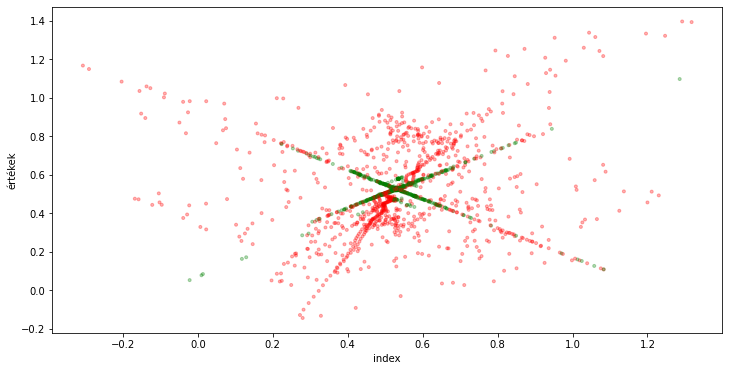

In [367]:
plot_embedding(embedding_list[:],y_train[:])

In [368]:
def grafikon3(fx,desc1,txt1,desc2="",txt2="",desc3="",txt3="",ngraf=2,c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)',c3='rgba(193,99,99,0.8)',title=None):
    '''
    fx: dataFrame
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title
    '''
    
    #x_=[i for i in range(len(y_pred))]
    if title==None:
      title=txt1+" "+txt2
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    fig0 = make_subplots(specs=[[{"secondary_y": True}]])


    if ngraf>=3:
        fig0.add_trace(
            go.Bar(x=fx.index, y=fx[desc3], marker_color='rgba(225, 20, 20,0.2)',  name=txt3, showlegend=True, ),
              secondary_y=False,
            #row=1, col=1
        )


    if ngraf>=2:
        fig0.add_trace(
            go.Scatter(x=fx.index, y=fx[desc2], name=txt2, line=dict(color=c2) ,showlegend=True  ),
            secondary_y=False,
            #row=1, col=1

        )

    fig0.add_trace(
        go.Scatter(x=fx.index, y=fx[desc1], name=txt1, line=dict(color=c1) ,showlegend=True  ),
        secondary_y=False,
        #row=1, col=1

    )

    fig0.update_layout(
        title=title,
        autosize=False,
        width=1200,
        height=600,
        
        )

    print(title)
    fig0.update_yaxes(title_text="<b>"+title+"</b>", secondary_y=False)
    #fig0.update_yaxes(title_text="<b>Alarm státusz</b>", secondary_y=True)
    fig0.update_layout(paper_bgcolor='rgb(200,200,200)')
    fig0.show()

In [369]:

history_df=pd.DataFrame({"epoch":history.epoch, "loss":history.history["loss"],"val_loss":history.history["val_loss"]})

KeyError: ignored

In [ ]:
grafikon3(history_df,"loss","Loss","val_loss","Val_Loss",title=None)